In [1]:
import requests
from bs4 import BeautifulSoup

## Necessary Strings

In [2]:
url = "https://books.google.com/ngrams/graph?content={}&case_insensitive=on&year_start=1800&year_end=2000&corpus=15&smoothing=3"

In [3]:
request_agent = "Mozilla/5.0 Chrome/47.0.2526.106 Safari/537.36"

In [4]:
def getSoup(url):
    return BeautifulSoup(requests.get(url,headers={'User-Agent':request_agent}).text,'lxml')

In [12]:
def get_word_before(word,POS):
    temp_url = url.format("*_"+POS+"+"+word)
    soup = getSoup(temp_url)
    word_str = soup.find("textarea",{"id":"share_url_text"}).text.split('direct_url')[1][1:]
    ws = word_str.split("%20")
    first = ws[0].split('%3B%2C')[1].split('%2')[1].split("_")[0].lower()
    return first
    

In [15]:
def get_word_after(word,POS):
    temp_url = url.format(word+"+*_"+POS)
    soup = getSoup(temp_url)
    word_str = soup.find("textarea",{"id":"share_url_text"}).text.split('direct_url')[1][1:]
    ws = word_str.split("%20")
    first = ws[2:][0].split("_")[0].lower()
    return first

In [17]:
get_word_after("big","NOUN")

'business'

# Create Color Maps

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import ast
import subprocess
#from pydub.playback import play
#from pydub import AudioSegment
from scipy.io import wavfile 
import numpy as np
from PIL import Image
#import cv2            
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt    
import os
import time

In [11]:
viridis = cm.get_cmap('Greens')
viridis.

False

In [5]:
viridis.colors[0]

[0.267004, 0.004874, 0.329415]

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
    [c('#E5F7E5'), c('#B2E8B2'), 0.33, c('#B2E8B2'), c('#00B300'), 0.66, c('#00B300')])


In [106]:
def get_spectogram_portion(wav_path,idx,filename,width,pho,c):   
    samplingFrequency, signalData = wavfile.read(wav_path) 
    # print(pho)                                           
    temp = []                                                                                         
    for i in range(len(signalData)):                                                                  
        if signalData[i] == 0:                                                                        
            continue                                                                                  
        else:                                                                                         
            temp.append(signalData[i])                                                                
    height = 3                                                                                                                                                                      
    fig = plt.figure(num=None, figsize=(width,height), dpi=80, facecolor='w', edgecolor='k')             
    ax = plt.subplot(111)                                                                             
    ax.specgram(temp,Fs=samplingFrequency,cmap=c)                                         
    ax.axis('off')                                                                                    
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)                         
    #fig.tight_layout()                                                                                
    out = filename    
    plt.show()
    #plt.savefig(out, transparent= True, bbox_inches = 'tight', pad_inches = 0)  
    return out  

In [115]:
g1 = make_colormap(
    [c('#e4f7d8'), c('#7cd93d'), 0.4, c('#7cd93d'), c('#3F751B'), 0.85, c('#3F751B')])

In [116]:
g2 = make_colormap([c('#e4f7dc'), c('#78db52'), 0.4, c('#78db52'), c('#3f751b'), 0.85, c('#3f751b')])

In [117]:
g3 = make_colormap([c('#eaf9da'), c('#9ae447'), 0.4, c('#9ae447'), c('#3f751b'), 0.85, c('#3f751b')])

In [118]:
g4 = make_colormap([c('#e0f4d2'), c('#90c858'), 0.4, c('#90c858'), c('#3f751b'), 0.85, c('#3f751b')])

In [119]:
g5 = make_colormap(
    [c('#e4f3db'), c('#7ac54c'), 0.4, c('#7ac54c'), c('#3f751b'), 0.85, c('#3f751b')])

In [120]:
g6 = make_colormap([c('#e6f9df'), c('#82e35f'), 0.4, c('#82e35f'), c('#3f751b'), 0.85, c('#3f751b')])

In [121]:
g7 = make_colormap([c('#ebfbd9'), c('#9ceb43'), 0.4, c('#9ceb43'), c('#3f751b'), 0.85, c('#3f751b')])

In [122]:
g8 = make_colormap(
    [c('#e7f7dc'), c('#89D751'), 0.4, c('#89D751'), c('#3f751b'), 0.85, c('#3f751b')])

In [124]:
print(g1)print(g1)

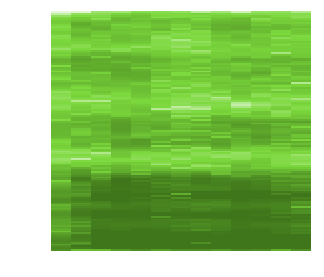

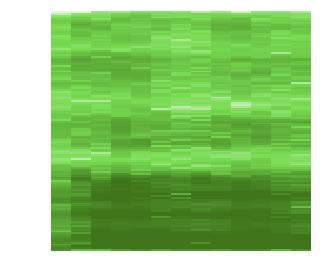

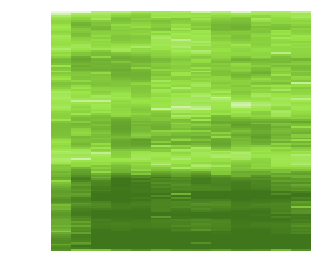

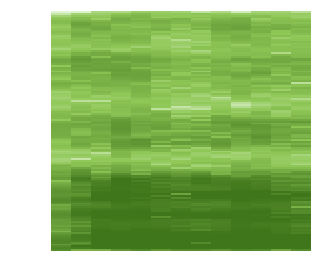

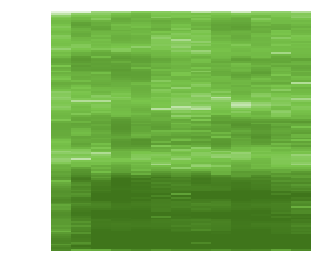

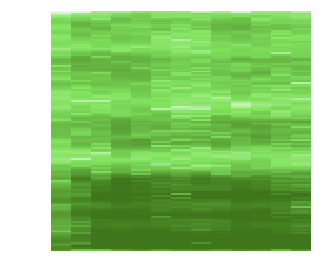

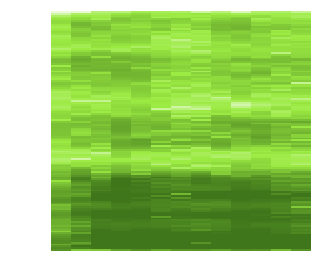

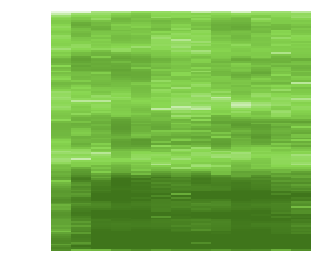

''

In [123]:
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g1)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g2)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g3)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g4)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g5)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g6)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g7)
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g8)

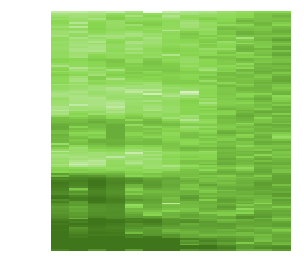

''

In [91]:
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g3)

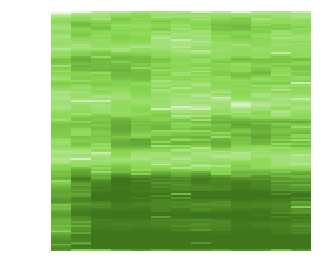

''

In [110]:
get_spectogram_portion('gentle-master/eh_B.wav',"","",3.25,"a",g1)